* https://langchain-ai.github.io/langgraph/tutorials/introduction/
* https://langchain-ai.github.io/langgraph/how-tos/subgraph/#define-subgraphs 

In [1]:
from dotenv import load_dotenv

load_dotenv() 


True

In [2]:
from graph_builders import create_default_casual_chatbot_graph_builder 

basic_casual_chatbot_graph = create_default_casual_chatbot_graph_builder() 

DEBUG [0]: ['tavily_search_results_json']


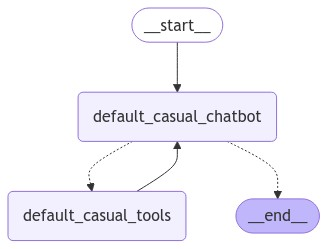

In [3]:
from IPython.display import Image, display

try:
    display(Image(basic_casual_chatbot_graph.compile().get_graph().draw_mermaid_png()))
except Exception:
    pass

In [4]:
from graph_builders import create_rigorous_llm_graph 

rigorous_llm_graph_builder = create_rigorous_llm_graph(
    chatbot_subgraph=basic_casual_chatbot_graph
)

rigorous_llm = rigorous_llm_graph_builder.compile() 

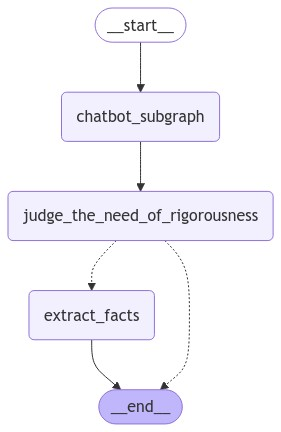

In [5]:
from IPython.display import Image, display

try:
    display(Image(rigorous_llm.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [6]:
def stream_graph_updates(user_input: str):
    for event in rigorous_llm.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    stream_graph_updates(user_input)

    # DEBUG 
    break 

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


DEBUG [1]: False


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Assistant: Wei-Fan Chiang is a Senior Software Engineer with 7+ years of experience in AI/ML and cloud development. He is cited by 353 researchers and has 20 publications. You can find more information about him on his [ResearchGate profile](https://www.researchgate.net/profile/Wei-Fan-Chiang-3), [LinkedIn profile](https://www.linkedin.com/in/wfchiang), and [Google Scholar profile](https://scholar.google.com/citations?user=w96423gAAAAJ).
(<class 'langchain_core.messages.human.HumanMessage'>): content='who is Wei-Fan Chiang?' additional_kwargs={} response_metadata={} id='cd166ba6-1a20-445e-81c7-4689292837d9'
(<class 'langchain_core.messages.ai.AIMessage'>): content='' additional_kwargs={'tool_calls': [{'id': 'call_bu5cn5clvP9vzXAiRxZl4Dav', 'function': {'arguments': '{"query":"Wei-Fan Chiang"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 89, 'total_tokens': 111, 'prompt_tokens

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Judgement of the need of rigorousness: True


Assistant: Rigorousness required
